# Regression

author: SheltonXiao       
2021/7/13

*Reference*     
*video: [李宏毅机器学习2019 P4](https://www.bilibili.com/video/BV1Ht411g7Ef?p=4&spm_id_from=pageDriver)*      
*notes: [DataWhale LeeML-Notes P4](https://datawhalechina.github.io/leeml-notes/#/chapter4/chapter4)*

> 现在假设有10个x_data和y_data，x和y之间的关系是y_data=b+w*x_data。b，w都是参数，是需要学习出来的。现在我们来练习用梯度下降找到b和w。

## import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

# matplotlib没有中文字体，动态解决
plt.rcParams['font.sans-serif'] = ['Simhei']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

## data preparation

In [79]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
x_d = np.asarray(x_data)
y_d = np.asarray(y_data)

*What is the difference between `np.asarray` and `np.array`*
According to [Numpy Documnetation](https://numpy.org/doc/stable/)     
`np.asarray`:
> Returns : out: ndarray       
Array interpretation of a. **No copy is performed** if the input is already an ndarray with matching dtype and order. If a is a subclass of ndarray, a base class ndarray is returned.      

`np.array`:    
> Parameters : copybool: optional        
If **true (default)**, then the object is copied. Otherwise, a copy will only be made if __array__ returns a copy, if obj is a nested sequence, or if a copy is needed to satisfy any of the other requirements (dtype, order, etc.).        
> Returns : out: ndarray          
An array object satisfying the specified requirements.

In [11]:
x_d2= np.array(x_data)

In [12]:
print(id(x_data))
print(id(x_d))
print(id(x_d2))

3033674123400
3033674166480
3033674167600


Because the type of `x_data` is not `np.ndarray`, `np.asarray` makes a copy to create the array. When it comes to the following situation, the difference between `np.asarray` and `np.array` is obvious.

In [14]:
x_d3= np.asarray(x_d2)
x_d4= np.array(x_d2)
print(id(x_d2))
print(id(x_d3))
print(id(x_d4))

3033674167600
3033674167600
3033674168160


It seems that the `np.asarray` in the creation of `x_d` and `y_d` plays the same role as `np.array`.

## Create the backgroud contour
You will find it so familiar if you have learnt MATLAB or something similar before.

In [15]:
x = np.arange(-200, -100, 1)
y = np.arange(-5, 5, 0.1)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)

TA provided the following codes. But I think it is not that good.     
Let's use the cell magic to learn how the codes perform.

In [61]:
%%timeit
# loss
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0  # meshgrid吐出结果：y为行，x为列
        for n in range(len(x_data)):
            Z[j][i] += (y_data[n] - b - w * x_data[n]) ** 2
        Z[j][i] /= len(x_data)

399 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


And I write the following codes to prevent using so much for loops.

In [62]:
%%timeit
x1 = x[np.newaxis,:]
y1 = y[:,np.newaxis]
Z2 = np.zeros((len(x), len(y)))
for n in range(len(x_data)):
    Z2 += (y_data[n] - x1 - y1 * x_data[n]) ** 2
Z2 /= len(x_data)

309 µs ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Actually we can prevent using all the for loops.

In [63]:
%%timeit
x1 = x[np.newaxis,:,np.newaxis]
y1 = y[:,np.newaxis,np.newaxis]
Z3 = np.zeros((len(x), len(y)))
x_data2 = x_d[np.newaxis,np.newaxis,:]#np.expand_dims(x_d[np.newaxis,:], axis=0)
y_data2 = y_d[np.newaxis,np.newaxis,:]
Z3 = np.mean((y_data2 - x1 - y1 * x_data2) ** 2,axis = 2)
#Z3 /= len(x_data)

535 µs ± 53 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The speed do not increse. Thus, we use the second codes.

In [64]:
x1 = x[np.newaxis,:]
y1 = y[:,np.newaxis]
for n in range(len(x_data)):
    Z += (y_data[n] - x1 - y1 * x_data[n]) ** 2
Z /= len(x_data)

## Calculate the partial differential

In [121]:
# Initial value
b=-120
w=-4
lr = 0.000005
iteration = 140000

In [66]:
# record the time
import time

In [105]:
def train(b, w, lr, iteration):
    b_history = []
    w_history = []
    loss_history = []
    
    start = time.time()
    for i in range(iteration):
        b_history.append(b)
        w_history.append(w)
        
        m = len(x_d)
        y_hat = w * x_d  + b
        loss = np.dot(y_d - y_hat, y_d - y_hat) / m
        grad_b = -2.0 * np.sum(y_d - y_hat) / m
        grad_w = -2.0 * np.dot(y_d - y_hat, x_d) / m
        # update param
        b -= lr * grad_b
        w -= lr * grad_w

        loss_history.append(loss)

    end = time.time()
    print("大约需要时间：",end-start)
    
    return b_history, w_history, loss_history

In [122]:
b_history, w_history, loss_history = train(b, w, lr, iteration)

大约需要时间： 2.441446542739868


In [117]:
def draw(b_history, w_history, loss_history):
    plt.figure(figsize = (8,6))
    plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
    plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
    plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
    plt.xlim(-200, -100)
    plt.ylim(-5, 5)
    plt.xlabel(r'$b$')
    plt.ylabel(r'$w$')
    plt.title("线性回归")
    
    plt.figure(figsize = (8,6))
    plt.plot(range(iteration), np.log(loss_history))
    plt.xlabel(r'$iteration$')
    plt.ylabel(r'$loss(log10)$')
    plt.title("损失函数")
    
    x_predict = np.arange(0,650,1)
    y_predict = b_history[-1] + w_history[-1] * x_predict
    
    plt.figure(figsize = (8,6))
    plt.plot(x_d, y_d, "o")
    plt.plot(x_predict, y_predict)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.title("拟合结果")

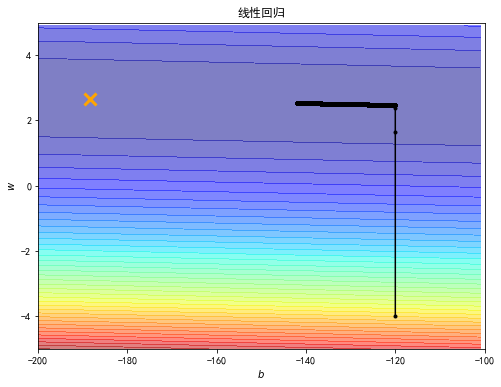

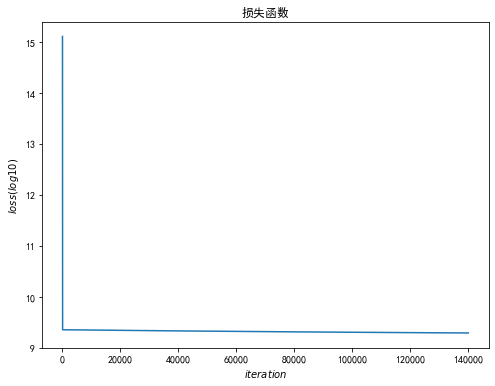

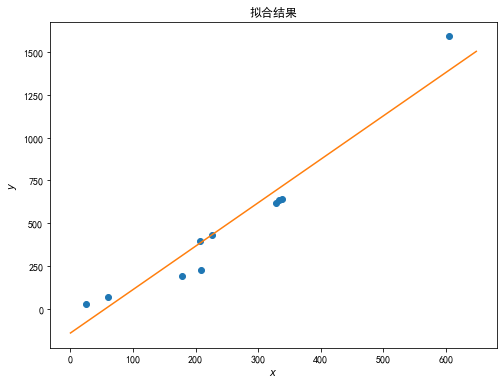

In [123]:
draw(b_history, w_history, loss_history)

大约需要时间： 2.378235340118408


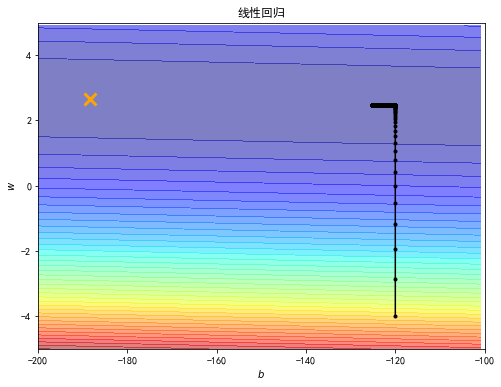

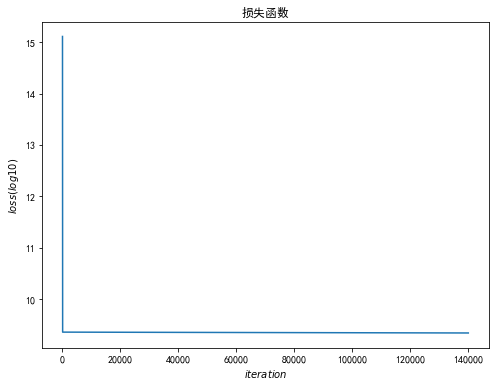

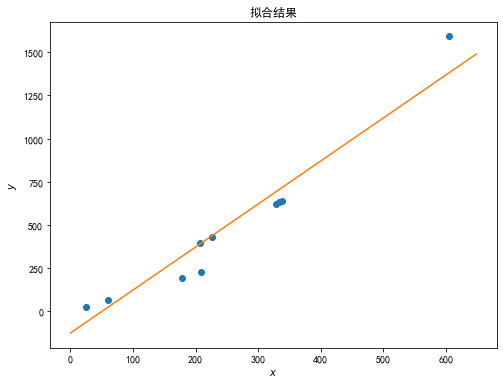

In [118]:
# Initial value
b=-120
w=-4
lr = 0.000001
iteration = 140000

b_history, w_history, loss_history = train(b, w, lr, iteration)

draw(b_history, w_history, loss_history)

increase learning rate

大约需要时间： 2.348525285720825


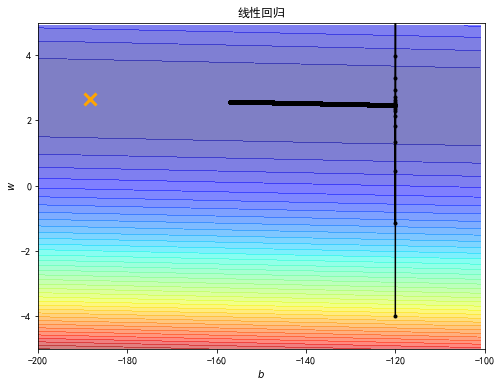

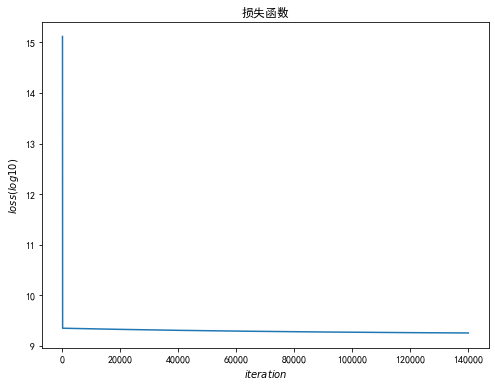

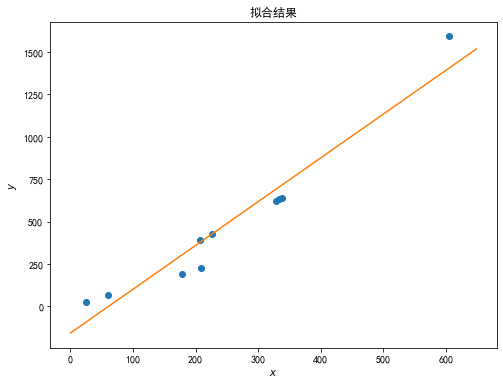

In [119]:
# Initial value
b=-120
w=-4
lr = 0.00001
iteration = 140000

b_history, w_history, loss_history = train(b, w, lr, iteration)

draw(b_history, w_history, loss_history)

increase learning rate

d:\programdata\python\python37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


大约需要时间： 2.2350404262542725


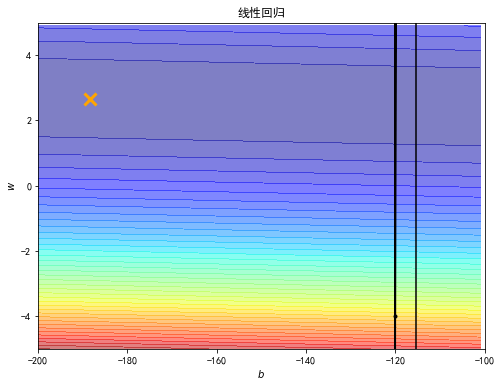

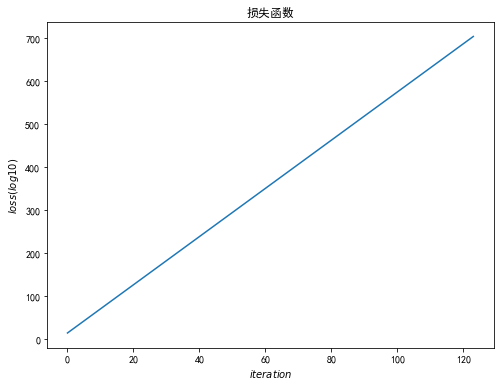

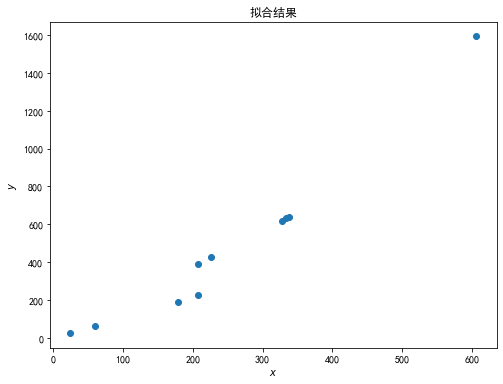

In [120]:
# Initial value
b=-120
w=-4
lr = 0.0001
iteration = 140000

b_history, w_history, loss_history = train(b, w, lr, iteration)

draw(b_history, w_history, loss_history)

大约需要时间： 3.2907724380493164


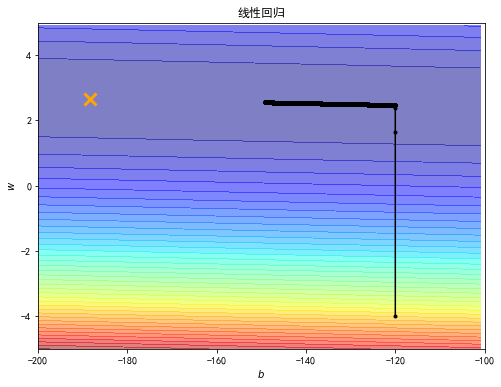

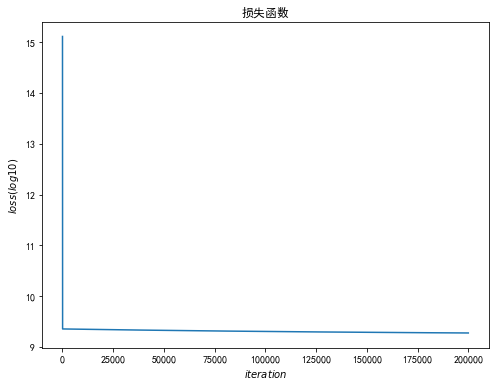

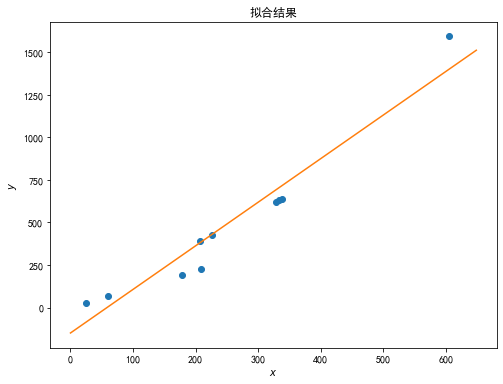

In [125]:
# Initial value
b=-120
w=-4
lr = 0.000005
iteration = 200000

b_history, w_history, loss_history = train(b, w, lr, iteration)

draw(b_history, w_history, loss_history)

## Special learning rate

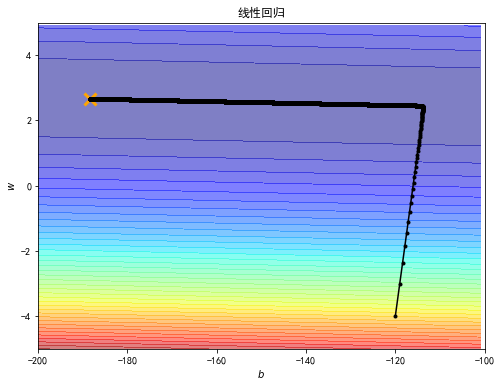

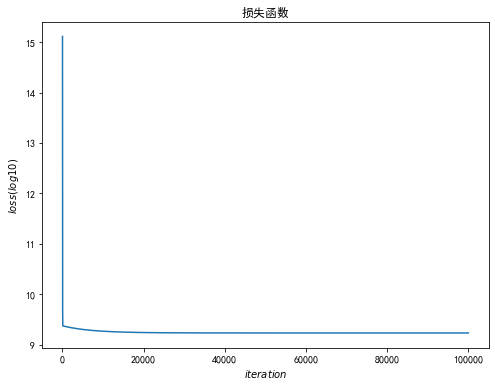

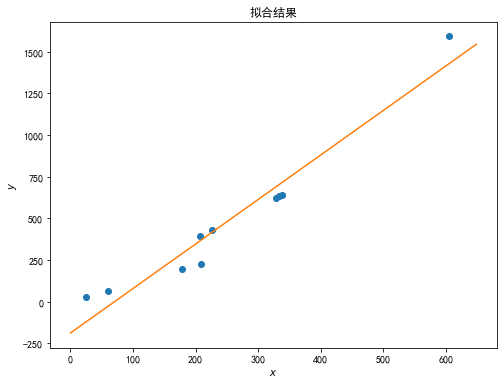

In [151]:
# linear regression
b = -120
w = -4
lr = 1
iteration = 100000

b_history = []
w_history = []
loss_history = []

lr_b=0
lr_w=0

for i in range(iteration):
    b_history.append(b)
    w_history.append(w)
    
    m = len(x_d)
    y_hat = w * x_d  + b
    loss = np.dot(y_d - y_hat, y_d - y_hat) / m
    
    b_grad = -np.sum(2.0 * (y_d - b - w * x_d) * 1.0)
    w_grad = -np.sum(2.0 * (y_d - b - w * x_d) * x_d)
    #b_grad=0.0
    #w_grad=0.0
    #for n in range(len(x_d)):
    #    b_grad = b_grad - 2.0 * (y_d[n] - b - w * x_d[n]) * 1.0
    #    w_grad = w_grad - 2.0 * (y_d[n] - b - w * x_d[n]) * x_d[n]
    
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    # update param
    b -= lr / np.sqrt(lr_b) * b_grad
    w -= lr / np.sqrt(lr_w) * w_grad

    loss_history.append(loss)
    
draw(b_history, w_history, loss_history)

不要加keepdims，加了存储不正确

In [154]:
b_grad = -np.sum(2.0 * (y_d - b - w * x_d) * 1.0)

In [156]:
lr_b = lr_b + b_grad ** 2
lr_b

6340738968.444927

In [157]:
b -= lr / np.sqrt(lr_b) * b_grad
b

-188.36684338181755

In [158]:
b_grad = -np.sum(2.0 * (y_d - b - w * x_d) * 1.0, keepdims = True)

In [159]:
lr_b = lr_b + b_grad ** 2
lr_b

array([6.34073897e+09])

In [160]:
b -= lr / np.sqrt(lr_b) * b_grad
b

array([-188.36684801])